In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#blue = "#0085C7"
#yellow = "#F4C300"
#green = "#009F3D"
#red = "#DF0024"
#black = "#000000"

In [3]:
# Create a file path
filepath = '../jessie_work/dropped_nulls_sorted.csv'
# Read in the data. 

df=pd.read_csv(filepath)

df.head(25)

# weight is in KG, height is in CM

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM
5,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Road Race, Individual",DNM
6,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,Cycling Men's 100 kilometres Team Time Trial,DNM
7,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Individual,DNM
8,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Team,DNM
9,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Fencing,"Fencing Men's epee, Team",DNM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196084 entries, 0 to 196083
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      196084 non-null  int64  
 1   Name    196084 non-null  object 
 2   Sex     196084 non-null  object 
 3   Age     196084 non-null  float64
 4   Height  196084 non-null  float64
 5   Weight  196084 non-null  float64
 6   Team    196084 non-null  object 
 7   NOC     196084 non-null  object 
 8   Games   196084 non-null  object 
 9   Year    196084 non-null  int64  
 10  Season  196084 non-null  object 
 11  City    196084 non-null  object 
 12  Sport   196084 non-null  object 
 13  Event   196084 non-null  object 
 14  Medal   196084 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 22.4+ MB


In [5]:
# My Question to Answer from this data is: Does hosting change % of medals won by country

In [6]:
#City-Country mapping dictionary
city_country_mapping = {
     'Roma': 'Italy',
    'Squaw Valley': 'United States',
    'Tokyo': 'Japan',
    'Innsbruck': 'Austria',
    'Mexico City': 'Mexico',
    'Grenoble': 'France',
    'Munich': 'Germany',
    'Sapporo': 'Japan',
    'Montreal': 'Canada',
    'Moskva': 'Russia',
    'Lake Placid': 'United States',
    'Los Angeles': 'United States',
    'Sarajevo': 'Bosnia and Herzegovina',
    'Seoul': 'South Korea',
    'Calgary': 'Canada',
    'Barcelona': 'Spain',
    'Albertville': 'France',
    'Lillehammer': 'Norway',
    'Atlanta': 'United States',
    'Nagano': 'Japan',
    'Sydney': 'Australia',
    'Salt Lake City': 'United States',
    'Athina': 'Greece',
    'Torino': 'Italy',
    'Beijing': 'China',
    'Vancouver': 'Canada',
    'London': 'United Kingdom',
    'Sochi': 'Russia',
    'Rio de Janeiro': 'Brazil'
}

In [7]:
# Add the 'Country' column to the DataFrame based on the city-country mapping
df['Country'] = df['City'].map(city_country_mapping)

# Display the updated DataFrame with the added 'Country' column
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM,Italy
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM,Italy
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver,Italy
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM,Italy
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196079,127234,Anna V'iacheslavivna Voloshyna,F,24.0,168.0,53.0,Ukraine,UKR,2016 Summer,2016,Summer,Rio de Janeiro,Synchronized Swimming,Synchronized Swimming Women's Team,DNM,Brazil
196080,27604,Kirill Georgiyevich Denisov,M,28.0,182.0,90.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Middleweight,DNM,Brazil
196081,14558,Luca Braidot,M,25.0,179.0,69.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Men's Mountainbike, Cross-Country",DNM,Brazil
196082,27623,Joel Dennerley,M,29.0,195.0,91.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,DNM,Brazil


In [8]:
# Assuming df is your DataFrame
df['Country'] = df['Country'].replace('United Kingdom', 'Great Britain')
df.loc[(df['Year'] == 1980) & (df['Country'] == 'Russia'), 'Country'] = 'Soviet Union'
df['Country'] = df['Country'].replace('Bosnia and Herzegovina', 'Yugoslavia')
df['Country'] = df['Country'].replace('Germany', 'West Germany')

In [9]:
# Assuming df is your DataFrame with a column named "year"
desired_year = 2012  # Specify the year you are looking for

# Use boolean indexing to filter rows where the "year" column matches the desired year
filtered_df = df[df['Year'] == desired_year]

# Display the filtered DataFrame
filtered_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
165444,41234,Saleh Saleh Gomaa,M,18.0,175.0,72.0,Egypt,EGY,2012 Summer,2012,Summer,London,Football,Football Men's Football,DNM,Great Britain
165445,86736,Mohamed Abdulrahman Al-Sayyid Nofel,M,27.0,180.0,71.0,Egypt,EGY,2012 Summer,2012,Summer,London,Rowing,Rowing Men's Lightweight Double Sculls,DNM,Great Britain
165446,60069,Kim Jong,F,23.0,158.0,53.0,North Korea,PRK,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,DNM,Great Britain
165447,63558,Veronika Kozelsk-Fenclov,F,31.0,171.0,70.0,Czech Republic,CZE,2012 Summer,2012,Summer,London,Sailing,Sailing Women's One Person Dinghy,DNM,Great Britain
165448,125027,"Louis Jacobus ""L. J."" van Zyl",M,27.0,182.0,79.0,South Africa,RSA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 400 metres Relay,DNM,Great Britain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177963,32516,Giulia Enrica Emmolo,F,20.0,171.0,67.0,Italy,ITA,2012 Summer,2012,Summer,London,Water Polo,Water Polo Women's Water Polo,DNM,Great Britain
177964,105239,Raysa Melany Snchez Alvarez,F,24.0,178.0,61.0,Dominican Republic,DOM,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 400 metres,DNM,Great Britain
177965,108023,Sharolyn Shantell Scott Norman,F,28.0,168.0,63.0,Costa Rica,CRC,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 400 metres Hurdles,DNM,Great Britain
177966,120215,Tian Qing,F,25.0,168.0,63.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Women's Doubles,Gold,Great Britain


In [10]:
# Select the columns Year, Season, Medal, City, and Team
df_sorted = df[["Games", "Medal", "City", "Team", "Country"]]
df_sorted.head()

,Games,Medal,City,Team,Country
0,1960 Summer,DNM,Roma,Poland,Italy
1,1960 Summer,DNM,Roma,Portugal,Italy
2,1960 Summer,Silver,Roma,Germany,Italy
3,1960 Summer,DNM,Roma,Norway,Italy
4,1960 Summer,DNM,Roma,Norway,Italy


In [11]:
# Filter the DataFrame to include only gold, silver, and bronze medals
filtered_df = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Calculate the total number of medals for each game
total_medals_available = filtered_df.groupby('Games')['Medal'].count().reset_index()

# Create a new DataFrame with unique games and their total medal count
unique_games = total_medals_available.drop_duplicates(subset=['Games']).reset_index(drop=True)

# Rename the 'Medal' column to 'Total_Medals_Available'
unique_games.rename(columns={'Medal': 'Total_Medals_Available'}, inplace=True)

# Display the new DataFrame with unique games and their total medal count
unique_games

,Games,Total_Medals_Available
0,1960 Summer,885
1,1960 Winter,91
2,1964 Summer,1018
3,1964 Winter,158
4,1968 Summer,1053
5,1968 Winter,195
6,1972 Summer,1202
7,1972 Winter,199
8,1976 Summer,1303
9,1976 Winter,195


In [12]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
team_country_host_df = df[(df['Team'] == df['Country']) & (df['City'].isin(city_country_mapping.keys()))].copy()

# Add the "Host_Country" column to the copied DataFrame
team_country_host_df['Host_Country'] = team_country_host_df['City'].map(city_country_mapping)

# Calculate the total number of medals for unique years when the team matches the country and the city is the host city
total_medals_team_country_host = team_country_host_df.groupby(['Games', 'Host_Country'])['Medal'].count().reset_index()

# Display the list or DataFrame with the unique years, total medal count, and corresponding host country
total_medals_team_country_host

,Games,Host_Country,Medal
0,1960 Summer,Italy,360
1,1960 Winter,United States,46
2,1964 Summer,Japan,446
3,1964 Winter,Austria,47
4,1968 Summer,Mexico,442
5,1968 Winter,France,96
6,1972 Summer,Germany,581
7,1972 Winter,Japan,118
8,1976 Summer,Canada,482
9,1976 Winter,Austria,54


In [13]:
# Assuming df is your original DataFrame and city_country_mapping is your mapping dictionary

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
team_country_host_df = df[(df['Team'] == df['Country']) & (df['City'].isin(city_country_mapping.keys()))].copy()

# Print the number of rows before filtering
print("Number of rows before filtering:", len(df))

# Add the "Host_Country" column to the copied DataFrame
team_country_host_df['Host_Country'] = team_country_host_df['City'].map(city_country_mapping)

# Calculate the total number of medals for unique years when the team matches the country and the city is the host city
total_medals_team_country_host = team_country_host_df.groupby(['Games', 'Host_Country'])['Medal'].count().reset_index()

# Print the number of rows after filtering
print("Number of rows after filtering:", len(total_medals_team_country_host))

Number of rows before filtering: 196084
Number of rows after filtering: 30


In [14]:
# Merge the total_medals_team_country_host DataFrame with the unique_games DataFrame based on the "Games" column
merged_df = total_medals_team_country_host.merge(unique_games, on='Games', how='left')

# Display the merged DataFrame with total medals available for each game
merged_df

,Games,Host_Country,Medal,Total_Medals_Available
0,1960 Summer,Italy,360,885
1,1960 Winter,United States,46,91
2,1964 Summer,Japan,446,1018
3,1964 Winter,Austria,47,158
4,1968 Summer,Mexico,442,1053
5,1968 Winter,France,96,195
6,1972 Summer,Germany,581,1202
7,1972 Winter,Japan,118,199
8,1976 Summer,Canada,482,1303
9,1976 Winter,Austria,54,195


In [15]:
# Calculate the percentage of medals won for each game
merged_df['Percentage_Medals_Won'] = merged_df['Medal'] / merged_df['Total_Medals_Available']

# Display the DataFrame with the new column for percentage of medals won
merged_df

,Games,Host_Country,Medal,Total_Medals_Available,Percentage_Medals_Won
0,1960 Summer,Italy,360,885,0.406780
1,1960 Winter,United States,46,91,0.505495
2,1964 Summer,Japan,446,1018,0.438114
3,1964 Winter,Austria,47,158,0.297468
4,1968 Summer,Mexico,442,1053,0.419753
5,1968 Winter,France,96,195,0.492308
6,1972 Summer,Germany,581,1202,0.483361
7,1972 Winter,Japan,118,199,0.592965
8,1976 Summer,Canada,482,1303,0.369916
9,1976 Winter,Austria,54,195,0.276923


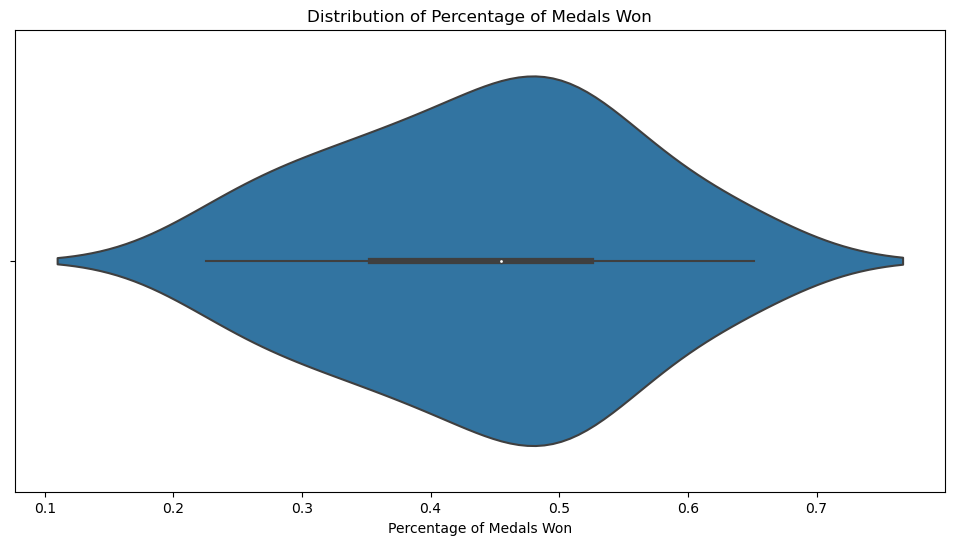

In [16]:
# Create a violin plot of the distribution of percentage of medals won
plt.figure(figsize=(12, 6))
sns.violinplot(x=merged_df['Percentage_Medals_Won'])
plt.title('Distribution of Percentage of Medals Won')
plt.xlabel('Percentage of Medals Won')
plt.show()

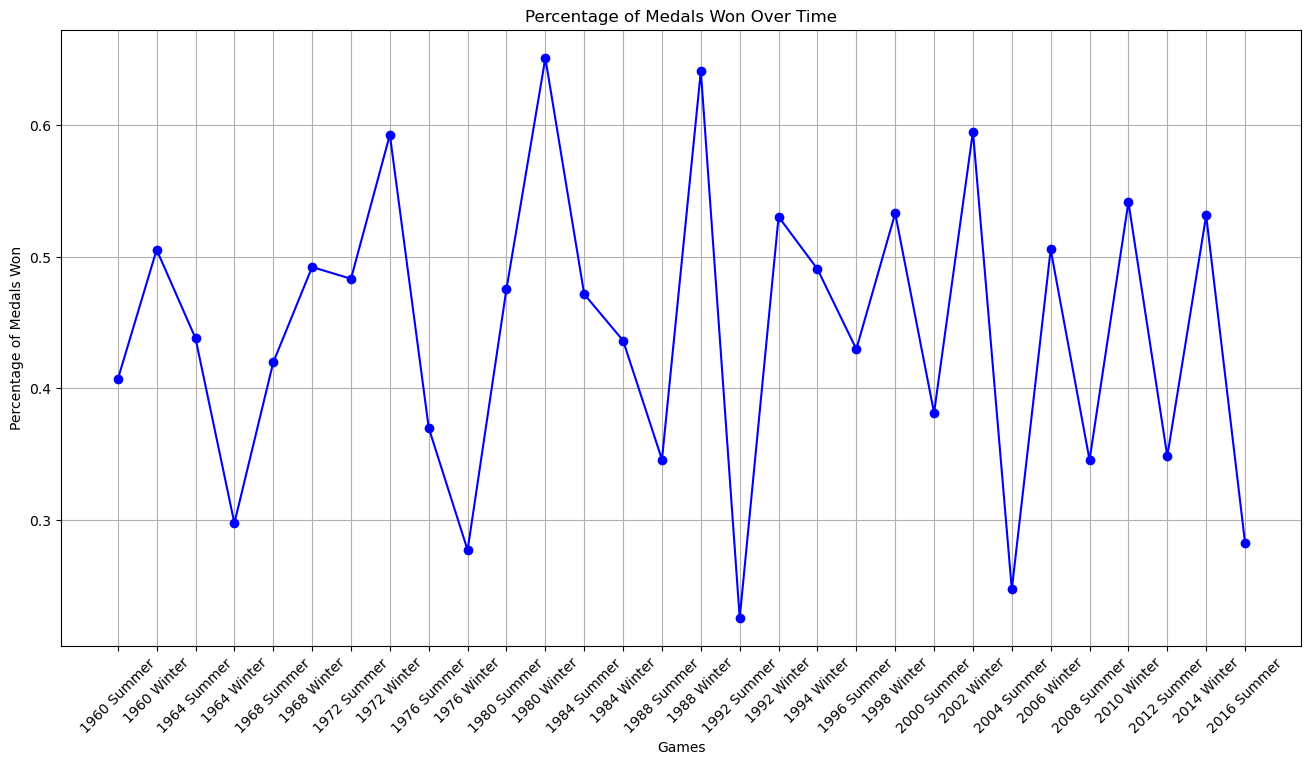

In [17]:
# Create a line plot of the percentage of medals won over time
plt.figure(figsize=(16, 8))
plt.plot(merged_df['Games'], merged_df['Percentage_Medals_Won'], marker='o', color='b', linestyle='-')
plt.title('Percentage of Medals Won Over Time')
plt.xlabel('Games')
plt.ylabel('Percentage of Medals Won')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
# List of countries to analyze
countries_list = ['Italy', 'United States', 'Japan', 'Austria', 'Mexico', 'France', 'Canada', 'South Korea', 'Spain', 'Norway', 'Germany', 'Australia', 'Greece', 'China', 'Russia', 'Brazil', 'Yugoslavia', 'Great Britain', 'Soviet Union']

In [19]:
# Step 2: Filter the DataFrame for a specific team (e.g., 'United States')
specific_team = 'United States'
specific_team_df = df[df['Team'] == specific_team]

# Step 3: Group by Team and Year, and calculate total medals for non-hosting years
grouped_df = specific_team_df.groupby(['Team', 'Year', 'Games'])['Medal'].count().reset_index()

# Step 4: Calculate the average total medals won by the specific team when they are not hosting
average_medals_specific_team = grouped_df['Medal'].mean()

print(f"Average Total Medals Won by {specific_team} When Not Hosting: {average_medals_specific_team}")

Average Total Medals Won by United States When Not Hosting: 405.1034482758621


In [20]:
# Step 2: Filter the DataFrame for a specific team (e.g., 'United States')
specific_team = 'United States'
specific_team_df = df[df['Team'] == specific_team].reset_index(drop=True)

# Step 3: Filter the DataFrame for Summer and Winter Olympics
summer_df = specific_team_df[specific_team_df['Games'].str.contains('Summer')]
winter_df = specific_team_df[specific_team_df['Games'].str.contains('Winter')]

# Step 4: Group by Team and Year, and calculate total medals for non-hosting years for Summer and Winter separately
grouped_summer_df = summer_df.groupby(['Team', 'Year'])['Medal'].count().reset_index()
grouped_winter_df = winter_df.groupby(['Team', 'Year'])['Medal'].count().reset_index()

# Step 5: Calculate the average total medals won by the specific team for Summer and Winter separately
average_medals_specific_team_summer = grouped_summer_df['Medal'].mean()
average_medals_specific_team_winter = grouped_winter_df['Medal'].mean()

print(f"Average Total Medals Won by {specific_team} in Summer Olympics When Not Hosting: {average_medals_specific_team_summer}")

Average Total Medals Won by United States in Summer Olympics When Not Hosting: 640.1428571428571


In [21]:
# Lists to store the data
country_data = []
summer_medals_data = []
winter_medals_data = []

# Iterate through the countries list
for specific_team in countries_list:
    specific_team_df = filtered_df[filtered_df['Team'] == specific_team]
    
    # Filter the DataFrame for Summer and Winter Olympics
    summer_df = specific_team_df[specific_team_df['Games'].str.contains('Summer')]
    winter_df = specific_team_df[specific_team_df['Games'].str.contains('Winter')]

    # Group by Team and Year, and calculate total medals for non-hosting years for Summer and Winter separately
    grouped_summer_df = summer_df.groupby(['Team', 'Year'])['Medal'].count().reset_index()
    grouped_winter_df = winter_df.groupby(['Team', 'Year'])['Medal'].count().reset_index()

    # Calculate the average total medals won by the specific team for Summer and Winter separately
    average_medals_specific_team_summer = grouped_summer_df['Medal'].mean()
    average_medals_specific_team_winter = grouped_winter_df['Medal'].mean()

    print(f"Average Total Medals Won by {specific_team} in Summer Olympics When Not Hosting: {average_medals_specific_team_summer}")
    print(f"Average Total Medals Won by {specific_team} in Winter Olympics When Not Hosting: {average_medals_specific_team_winter}")

    # Append the data to the lists
    country_data.append(specific_team)
    summer_medals_data.append(average_medals_specific_team_summer)
    winter_medals_data.append(average_medals_specific_team_winter)

# Create a DataFrame from the lists
data = {'Country': country_data, 'Summer Average Medals': summer_medals_data, 'Winter Average Medals': winter_medals_data}
results_df = pd.DataFrame(data)

Average Total Medals Won by Italy in Summer Olympics When Not Hosting: 53.46666666666667
Average Total Medals Won by Italy in Winter Olympics When Not Hosting: 10.538461538461538
Average Total Medals Won by United States in Summer Olympics When Not Hosting: 221.28571428571428
Average Total Medals Won by United States in Winter Olympics When Not Hosting: 28.4
Average Total Medals Won by Japan in Summer Olympics When Not Hosting: 53.07142857142857
Average Total Medals Won by Japan in Winter Olympics When Not Hosting: 5.545454545454546
Average Total Medals Won by Austria in Summer Olympics When Not Hosting: 3.6153846153846154
Average Total Medals Won by Austria in Winter Olympics When Not Hosting: 13.642857142857142
Average Total Medals Won by Mexico in Summer Olympics When Not Hosting: 5.066666666666666
Average Total Medals Won by Mexico in Winter Olympics When Not Hosting: nan
Average Total Medals Won by France in Summer Olympics When Not Hosting: 47.266666666666666
Average Total Medals

In [22]:
# Display the DataFrame
results_df.fillna(0, inplace=True)
results_df

,Country,Summer Average Medals,Winter Average Medals
0,Italy,53.466667,10.538462
1,United States,221.285714,28.400000
2,Japan,53.071429,5.545455
3,Austria,3.615385,13.642857
4,Mexico,5.066667,0.000000
5,France,47.266667,7.933333
6,Canada,32.928571,31.000000
7,South Korea,34.307692,11.142857
8,Spain,32.307692,1.000000
9,Norway,15.166667,20.600000


In [23]:
results_df['Country'] = results_df['Country'].replace('Yugoslavia', 'Bosnia and Herzegovina')
results_df['Country'] = results_df['Country'].replace('Great Britain', 'United Kingdom')

results_df

,Country,Summer Average Medals,Winter Average Medals
0,Italy,53.466667,10.538462
1,United States,221.285714,28.400000
2,Japan,53.071429,5.545455
3,Austria,3.615385,13.642857
4,Mexico,5.066667,0.000000
5,France,47.266667,7.933333
6,Canada,32.928571,31.000000
7,South Korea,34.307692,11.142857
8,Spain,32.307692,1.000000
9,Norway,15.166667,20.600000


In [24]:
final_df = pd.merge(merged_df, results_df, left_on='Host_Country', right_on='Country', how='left')

# Display the merged DataFrame
print(final_df.info())
final_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Games                   30 non-null     object 
 1   Host_Country            30 non-null     object 
 2   Medal                   30 non-null     int64  
 3   Total_Medals_Available  30 non-null     int64  
 4   Percentage_Medals_Won   30 non-null     float64
 5   Country                 30 non-null     object 
 6   Summer Average Medals   30 non-null     float64
 7   Winter Average Medals   30 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.0+ KB
None


,Games,Host_Country,Medal,Total_Medals_Available,Percentage_Medals_Won,Country,Summer Average Medals,Winter Average Medals
0,1960 Summer,Italy,360,885,0.406780,Italy,53.466667,10.538462
1,1960 Winter,United States,46,91,0.505495,United States,221.285714,28.400000
2,1964 Summer,Japan,446,1018,0.438114,Japan,53.071429,5.545455
3,1964 Winter,Austria,47,158,0.297468,Austria,3.615385,13.642857
4,1968 Summer,Mexico,442,1053,0.419753,Mexico,5.066667,0.000000
5,1968 Winter,France,96,195,0.492308,France,47.266667,7.933333
6,1972 Summer,Germany,581,1202,0.483361,Germany,124.888889,30.111111
7,1972 Winter,Japan,118,199,0.592965,Japan,53.071429,5.545455
8,1976 Summer,Canada,482,1303,0.369916,Canada,32.928571,31.000000
9,1976 Winter,Austria,54,195,0.276923,Austria,3.615385,13.642857


In [25]:
ddf = final_df.drop(columns=['Country'])

In [26]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Games                   30 non-null     object 
 1   Host_Country            30 non-null     object 
 2   Medal                   30 non-null     int64  
 3   Total_Medals_Available  30 non-null     int64  
 4   Percentage_Medals_Won   30 non-null     float64
 5   Summer Average Medals   30 non-null     float64
 6   Winter Average Medals   30 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ KB


In [27]:
unique_games.head()

,Games,Total_Medals_Available
0,1960 Summer,885
1,1960 Winter,91
2,1964 Summer,1018
3,1964 Winter,158
4,1968 Summer,1053


In [28]:
# Calculate the average total medals available for Summer and Winter Olympics
average_summer_medals = unique_games[unique_games['Games'].str.contains('Summer')]['Total_Medals_Available'].mean()
average_winter_medals = unique_games[unique_games['Games'].str.contains('Winter')]['Total_Medals_Available'].mean()

print("Average Total Medals Available for Summer Olympics:", average_summer_medals)
print("Average Total Medals Available for Winter Olympics:", average_winter_medals)

Average Total Medals Available for Summer Olympics: 1538.2666666666667
Average Total Medals Available for Winter Olympics: 310.93333333333334


In [29]:
# Assuming df is your DataFrame with the columns mentioned
ddf['Summer Average %'] = ddf['Summer Average Medals'] / 1538.2666
ddf['Winter Average %'] = ddf['Winter Average Medals'] / 310.933333


# Display the DataFrame to see the new column
ddf

,Games,Host_Country,Medal,Total_Medals_Available,Percentage_Medals_Won,Summer Average Medals,Winter Average Medals,Summer Average %,Winter Average %
0,1960 Summer,Italy,360,885,0.406780,53.466667,10.538462,0.034758,0.033893
1,1960 Winter,United States,46,91,0.505495,221.285714,28.400000,0.143854,0.091338
2,1964 Summer,Japan,446,1018,0.438114,53.071429,5.545455,0.034501,0.017835
3,1964 Winter,Austria,47,158,0.297468,3.615385,13.642857,0.002350,0.043877
4,1968 Summer,Mexico,442,1053,0.419753,5.066667,0.000000,0.003294,0.000000
5,1968 Winter,France,96,195,0.492308,47.266667,7.933333,0.030727,0.025515
6,1972 Summer,Germany,581,1202,0.483361,124.888889,30.111111,0.081188,0.096841
7,1972 Winter,Japan,118,199,0.592965,53.071429,5.545455,0.034501,0.017835
8,1976 Summer,Canada,482,1303,0.369916,32.928571,31.000000,0.021406,0.099700
9,1976 Winter,Austria,54,195,0.276923,3.615385,13.642857,0.002350,0.043877


In [30]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Games                   30 non-null     object 
 1   Host_Country            30 non-null     object 
 2   Medal                   30 non-null     int64  
 3   Total_Medals_Available  30 non-null     int64  
 4   Percentage_Medals_Won   30 non-null     float64
 5   Summer Average Medals   30 non-null     float64
 6   Winter Average Medals   30 non-null     float64
 7   Summer Average %        30 non-null     float64
 8   Winter Average %        30 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.2+ KB


In [31]:
dmf = ddf.rename(columns={
    'Games': 'Olympic Games',
    'Host_Country': 'Host Country',
    'Medal': 'Medals Won',
    'Total_Medals_Available': 'Total Medals Available',
    'Percentage_Medals_Won': '% Medals Won',
    'Summer Average Medals': 'Summer Average Medals Won',
    'Winter Average Medals': 'Winter Average Medals Won',
    'Summer Average %': 'Summer Average % Won',
    'Winter Average %': 'Winter Average % Won'
})

# Display the DataFrame with the renamed columns
dmf

,Olympic Games,Host Country,Medals Won,Total Medals Available,% Medals Won,Summer Average Medals Won,Winter Average Medals Won,Summer Average % Won,Winter Average % Won
0,1960 Summer,Italy,360,885,0.406780,53.466667,10.538462,0.034758,0.033893
1,1960 Winter,United States,46,91,0.505495,221.285714,28.400000,0.143854,0.091338
2,1964 Summer,Japan,446,1018,0.438114,53.071429,5.545455,0.034501,0.017835
3,1964 Winter,Austria,47,158,0.297468,3.615385,13.642857,0.002350,0.043877
4,1968 Summer,Mexico,442,1053,0.419753,5.066667,0.000000,0.003294,0.000000
5,1968 Winter,France,96,195,0.492308,47.266667,7.933333,0.030727,0.025515
6,1972 Summer,Germany,581,1202,0.483361,124.888889,30.111111,0.081188,0.096841
7,1972 Winter,Japan,118,199,0.592965,53.071429,5.545455,0.034501,0.017835
8,1976 Summer,Canada,482,1303,0.369916,32.928571,31.000000,0.021406,0.099700
9,1976 Winter,Austria,54,195,0.276923,3.615385,13.642857,0.002350,0.043877


In [32]:
ddf.to_csv('output.csv', index=False)

In [33]:
# Assuming your DataFrame is named ddf
numbers = [0.034757737, 0.091337907, 0.0345008, 0.043877113, 0.003293751, 0.02551458, 0.081188065, 0.017834867, 0.021406284, 0.043877113, 0.095453762, 0.091337907, 0.143853942, 0.011256432, 0.022302826, 0.099699829, 0.021002661, 0.02551458, 0.066252144, 0.143853942, 0.017834867, 0.04905955, 0.091337907, 0.004713097, 0.033892994, 0.059807578, 0.099699829, 0.035884547, 0.111492281, 0.01807229]
my_list = [
    53.46666667,
    28.4,
    53.07142857,
    13.64285714,
    5.066666667,
    7.933333333,
    124.8888889,
    5.545454545,
    32.92857143,
    13.64285714,
    146.8333333,
    28.4,
    221.2857143,
    3.5,
    34.30769231,
    31,
    32.30769231,
    7.933333333,
    20.6,
    221.2857143,
    5.545454545,
    75.46666667,
    28.4,
    7.25,
    10.53846154,
    92,
    31,
    55.2,
    34.66666667,
    27.8
]

dmf['Average Medal Won'] = my_list
dmf['% Average Medal Win'] = numbers

dmf

,Olympic Games,Host Country,Medals Won,Total Medals Available,% Medals Won,Summer Average Medals Won,Winter Average Medals Won,Summer Average % Won,Winter Average % Won,Average Medal Won,% Average Medal Win
0,1960 Summer,Italy,360,885,0.406780,53.466667,10.538462,0.034758,0.033893,53.466667,0.034758
1,1960 Winter,United States,46,91,0.505495,221.285714,28.400000,0.143854,0.091338,28.400000,0.091338
2,1964 Summer,Japan,446,1018,0.438114,53.071429,5.545455,0.034501,0.017835,53.071429,0.034501
3,1964 Winter,Austria,47,158,0.297468,3.615385,13.642857,0.002350,0.043877,13.642857,0.043877
4,1968 Summer,Mexico,442,1053,0.419753,5.066667,0.000000,0.003294,0.000000,5.066667,0.003294
5,1968 Winter,France,96,195,0.492308,47.266667,7.933333,0.030727,0.025515,7.933333,0.025515
6,1972 Summer,Germany,581,1202,0.483361,124.888889,30.111111,0.081188,0.096841,124.888889,0.081188
7,1972 Winter,Japan,118,199,0.592965,53.071429,5.545455,0.034501,0.017835,5.545455,0.017835
8,1976 Summer,Canada,482,1303,0.369916,32.928571,31.000000,0.021406,0.099700,32.928571,0.021406
9,1976 Winter,Austria,54,195,0.276923,3.615385,13.642857,0.002350,0.043877,13.642857,0.043877


In [34]:
dmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Olympic Games              30 non-null     object 
 1   Host Country               30 non-null     object 
 2   Medals Won                 30 non-null     int64  
 3   Total Medals Available     30 non-null     int64  
 4   % Medals Won               30 non-null     float64
 5   Summer Average Medals Won  30 non-null     float64
 6   Winter Average Medals Won  30 non-null     float64
 7   Summer Average % Won       30 non-null     float64
 8   Winter Average % Won       30 non-null     float64
 9   Average Medal Won          30 non-null     float64
 10  % Average Medal Win        30 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 2.7+ KB


In [35]:
final = dmf.drop(columns=['Summer Average % Won', 'Winter Average % Won', 'Winter Average Medals Won', 'Summer Average Medals Won'])
final

,Olympic Games,Host Country,Medals Won,Total Medals Available,% Medals Won,Average Medal Won,% Average Medal Win
0,1960 Summer,Italy,360,885,0.406780,53.466667,0.034758
1,1960 Winter,United States,46,91,0.505495,28.400000,0.091338
2,1964 Summer,Japan,446,1018,0.438114,53.071429,0.034501
3,1964 Winter,Austria,47,158,0.297468,13.642857,0.043877
4,1968 Summer,Mexico,442,1053,0.419753,5.066667,0.003294
5,1968 Winter,France,96,195,0.492308,7.933333,0.025515
6,1972 Summer,Germany,581,1202,0.483361,124.888889,0.081188
7,1972 Winter,Japan,118,199,0.592965,5.545455,0.017835
8,1976 Summer,Canada,482,1303,0.369916,32.928571,0.021406
9,1976 Winter,Austria,54,195,0.276923,13.642857,0.043877


In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Olympic Games           30 non-null     object 
 1   Host Country            30 non-null     object 
 2   Medals Won              30 non-null     int64  
 3   Total Medals Available  30 non-null     int64  
 4   % Medals Won            30 non-null     float64
 5   Average Medal Won       30 non-null     float64
 6   % Average Medal Win     30 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ KB


In [37]:
finalfinal = final[['Olympic Games', 'Host Country', 'Total Medals Available', 'Medals Won', 'Average Medal Won', '% Medals Won', '% Average Medal Win']]  # Specify the order of columns here
finalfinal

,Olympic Games,Host Country,Total Medals Available,Medals Won,Average Medal Won,% Medals Won,% Average Medal Win
0,1960 Summer,Italy,885,360,53.466667,0.406780,0.034758
1,1960 Winter,United States,91,46,28.400000,0.505495,0.091338
2,1964 Summer,Japan,1018,446,53.071429,0.438114,0.034501
3,1964 Winter,Austria,158,47,13.642857,0.297468,0.043877
4,1968 Summer,Mexico,1053,442,5.066667,0.419753,0.003294
5,1968 Winter,France,195,96,7.933333,0.492308,0.025515
6,1972 Summer,Germany,1202,581,124.888889,0.483361,0.081188
7,1972 Winter,Japan,199,118,5.545455,0.592965,0.017835
8,1976 Summer,Canada,1303,482,32.928571,0.369916,0.021406
9,1976 Winter,Austria,195,54,13.642857,0.276923,0.043877


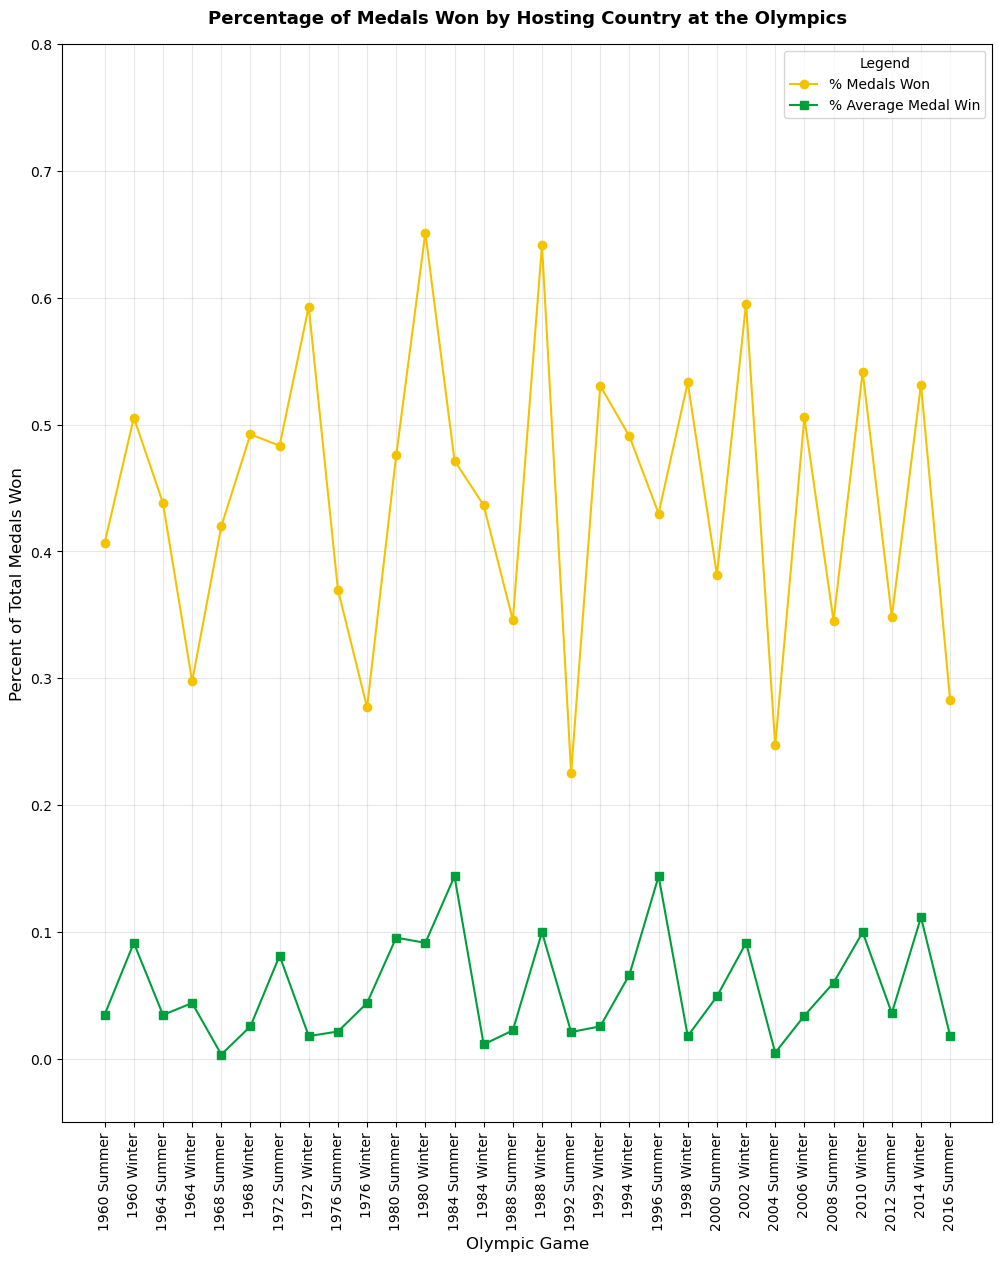

In [46]:
# Plot the data as a line chart
plt.figure(figsize=(12, 14))

plt.plot(finalfinal['Olympic Games'], finalfinal['% Medals Won'], marker='o', color='#F4C300', label='% Medals Won')
plt.plot(finalfinal['Olympic Games'], finalfinal['% Average Medal Win'], marker='s', color='#009F3D', label='% Average Medal Win')

plt.xlabel('Olympic Game', fontsize=12)
plt.ylabel('Percent of Total Medals Won', fontsize=12)
plt.title('Percentage of Medals Won by Hosting Country at the Olympics', fontsize=13, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.legend(title='Legend', loc='upper right')
plt.ylim(-.05,0.8)

# Add gridlines with low alpha
plt.grid(alpha=0.3)

# Save the plot to an image file
plt.savefig('medals_won_hosting_comparison.png', dpi=300)  # Save as a PNG file with 300 dpi resolution

In [68]:
tmt = total_medals_team_country_host
tmt

,Games,Host_Country,Medal
0,1960 Summer,Italy,360
1,1960 Winter,United States,46
2,1964 Summer,Japan,446
3,1964 Winter,Austria,47
4,1968 Summer,Mexico,442
5,1968 Winter,France,96
6,1972 Summer,Germany,581
7,1972 Winter,Japan,118
8,1976 Summer,Canada,482
9,1976 Winter,Austria,54


In [69]:
#Update the value in the 'Host_Country' column from 'Bosnia and Herzegovina' to 'Yugoslavia'
tmt.loc[tmt['Host_Country'] == 'Bosnia and Herzegovina', 'Host_Country'] = 'Yugoslavia'
tmt.loc[tmt['Host_Country'] == 'United Kingdom', 'Host_Country'] = 'U.K.'

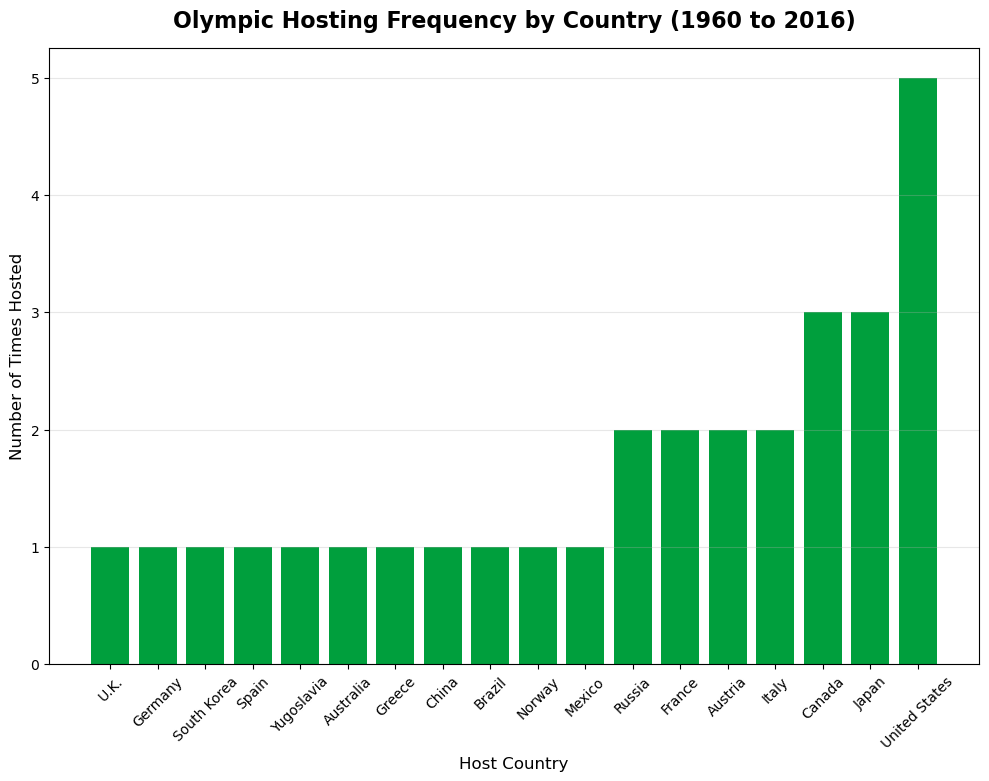

In [70]:
# Count the number of times each country has hosted the Olympics
country_counts = tmt['Host_Country'].value_counts().reset_index()
country_counts.columns = ['Host_Country', 'Count']

# Sort the DataFrame by the count in ascending order
country_counts = country_counts.sort_values('Count')
#Then, you can create the bar graph visualization using the sorted DataFrame:
plt.figure(figsize=(12, 8))
plt.bar(country_counts['Host_Country'], country_counts['Count'], color='#009F3D')
plt.xlabel('Host Country', fontsize=12)
plt.ylabel('Number of Times Hosted', fontsize=12)
plt.title('Olympic Hosting Frequency by Country (1960 to 2016)', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Save the plot to an image file
plt.savefig('hosting_frequency.png', dpi=300)  # Save as a PNG file with 300 dpi resolution

plt.show()
